In [1]:
%matplotlib notebook
import numpy as np
from sklearn import preprocessing
import pandas as pd
from sklearn.decomposition import PCA
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

In [2]:
def init():
    X = pd.read_csv("train.csv")
    X = X[['A1', 'B1', 'C1', 'C3', 'D1', 'E1', 'F', 'I','Target']]
    
    return X



In [24]:
pd.read_csv("train.csv")

,A1,B1,C1,C3,D1,E1,F,G,H,I,D2,E2,A2,B2,C2,Target
0,1,0,0,0,0,0,35.06,1.07,0,46.28,0.00,0.0,0.22,0.00,0.0,0
1,1,0,0,0,0,0,40.40,0.73,0,91.22,0.00,0.0,0.11,0.00,0.0,0
2,1,0,0,0,0,0,41.98,3.11,1,6.50,0.00,0.0,1.54,0.00,0.0,0
3,1,0,0,0,0,0,51.95,7.66,0,3.27,0.00,0.0,3.05,0.00,0.0,0
4,4,0,0,0,0,0,46.66,5.88,1,8.21,0.00,0.0,4.87,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41126,3,0,0,0,0,0,57.58,15.77,1,3.48,0.00,0.0,8.62,0.00,0.0,0
41127,11,0,0,0,0,0,46.76,1.30,0,30.12,0.00,0.0,3.65,0.00,0.0,0
41128,1,0,0,0,0,0,29.00,7.42,1,4.93,0.00,0.0,2.03,0.00,0.0,0
41129,14089,3,0,0,21,10,45.69,2.00,0,20090.44,0.01,0.0,7.01,0.15,0.0,0


In [6]:
def filterOutlier(X, threshold=6):
    X = np.array(X)
    zscore = stats.zscore(X[:,:X.shape[1]-1])
    zscore = np.abs(zscore)

    filtered_entries = (zscore < threshold).all(axis=1)
    X = X[filtered_entries]
    return X

In [7]:
def extractDataTarget(X):
    X = np.array(X)
    X_target = X[:,-1]
    X = X[:,0:X.shape[1]-1]
    scaler = preprocessing.StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    return X_scaled, X_target

In [8]:
def pcaTargetCombine(X_scaled, X_target, n_components=3):
    
    pca = PCA(n_components)
    X_pca = pca.fit(X_scaled).transform(X_scaled)
    X_pca= np.c_[X_pca, X_target]
    return X_pca



In [13]:
def plot3d(X):
    fig = plt.figure(figsize=(11,11))
    ax = fig.add_subplot(111, projection='3d')

    tmpOnes = [x[:4] for x in X if x[-1]==1]
    tmpZeros = [x[:4] for x in X if x[-1]==0]

    X_ones = np.array(tmpOnes)
    X_zeros = np.array(tmpZeros)



    ax.scatter(X_ones[:,0], X_ones[:,1], X_ones[:,2], marker="^", c = "r")
    ax.scatter(X_zeros[:,0], X_zeros[:,1], X_zeros[:,2], c = "b", alpha=0.2)
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.set_zlabel("z-axis")
    return ax




In [14]:
def mysvm(X, C=1):
    
    
    fig = plt.figure(figsize=(11,11))
    ax = fig.add_subplot(111, projection='3d')
    
    
    tmpOnes = [x[:4] for x in X if x[-1]==1]
    tmpZeros = [x[:4] for x in X if x[-1]==0]

    X_ones = np.array(tmpOnes)
    X_zeros = np.array(tmpZeros)
    print(X_zeros)
    
    ax.scatter(X_ones[:,0], X_ones[:,1], X_ones[:,2], marker="^", c = "r")
    ax.scatter(X_zeros[:,0], X_zeros[:,1], X_zeros[:,2], c = "b", alpha=0.1)

    
    y = X[:,3]
    X = X[:,:3]
    clf = svm.SVC(kernel="linear", C=C)
    clf.fit(X, y)

    
    xx, yy = np.meshgrid(np.linspace(0,1, 2), np.linspace(0,1,2))
    
    z = (-clf.coef_[0][0]*xx - clf.coef_[0][1]*yy - clf.intercept_)/clf.coef_[0][2]
    



    ax.plot_surface(xx, yy, z, alpha=0.4)
    plt.show()


In [15]:
def mysvm1(X, C=1):
    
    ax = plot3d(X)
     
    y = X[:,3]
    X = X[:,:3]
    clf = svm.SVC(kernel="linear", C=C)
    clf.fit(X, y)

    
    xx, yy = np.meshgrid(np.linspace(-5,15, 5), np.linspace(-5,15,5))

    z = (-clf.coef_[0][0]*xx - clf.coef_[0][1]*yy-clf.intercept_)/clf.coef_[0][2]
    
    ax.set_zlim3d(-5,30)



    ax.plot_surface(xx, yy, z, alpha=0.4)
    plt.show()
    

104
40027


<IPython.core.display.Javascript object>


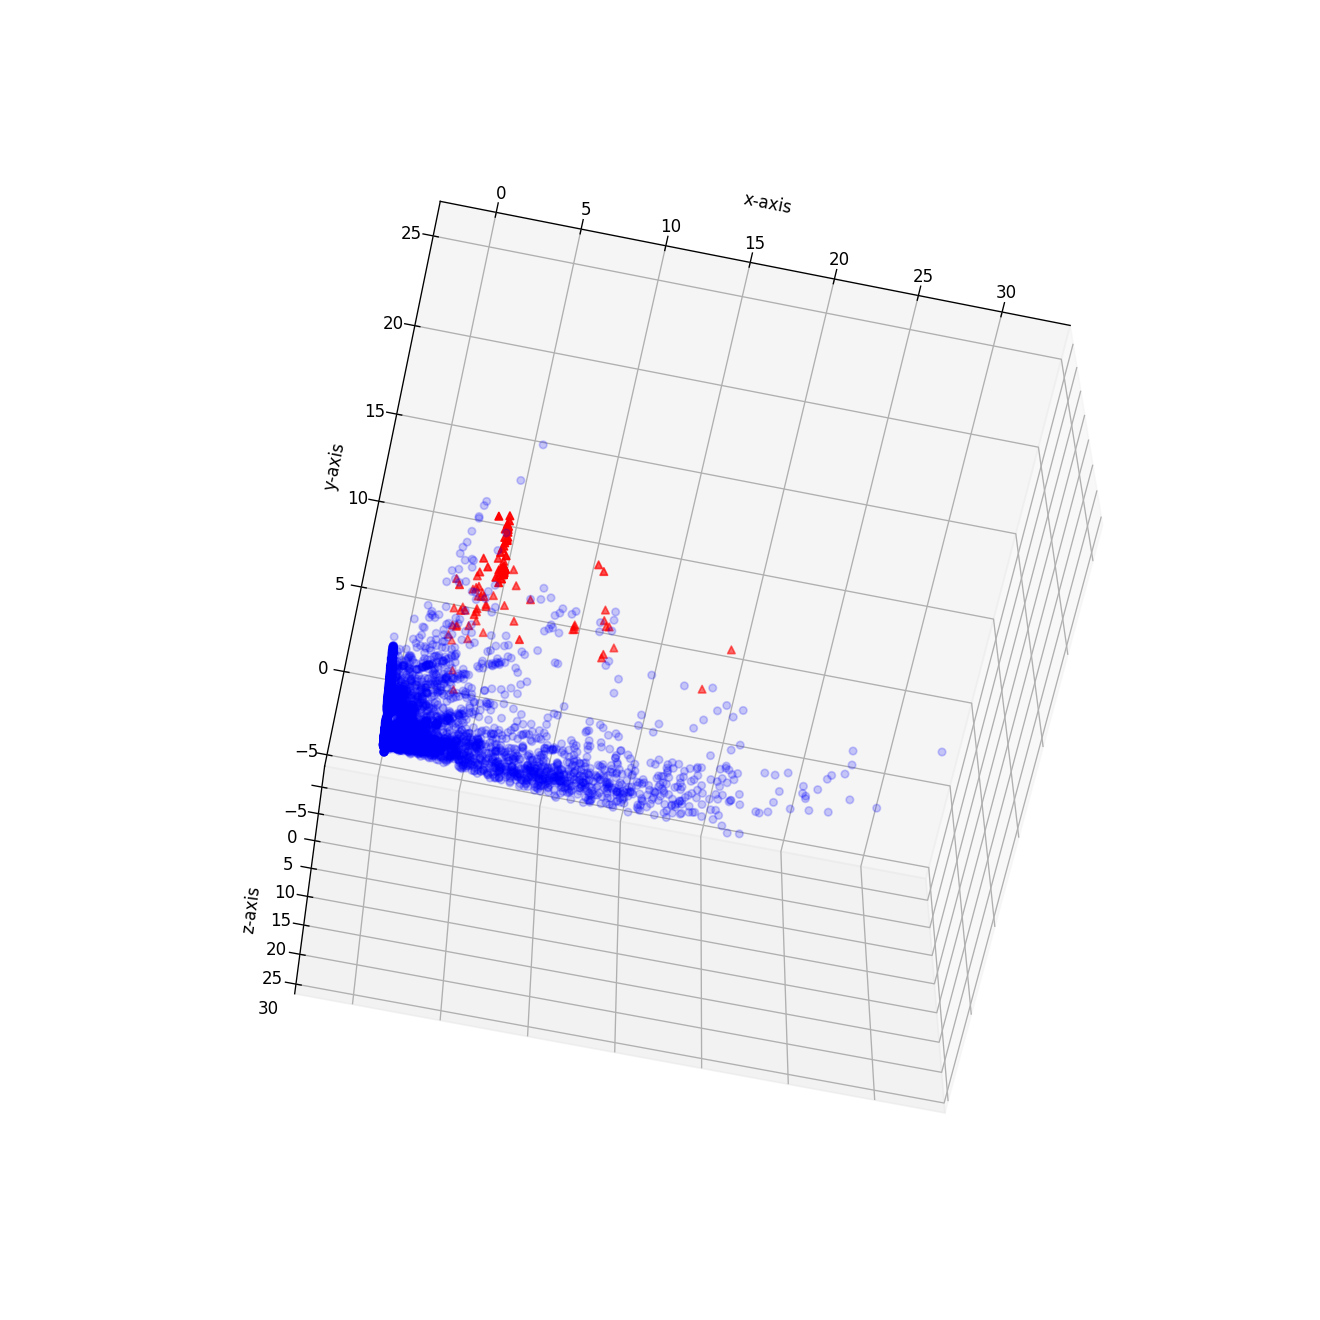

<Axes3DSubplot:xlabel='x-axis', ylabel='y-axis'>

In [16]:
X = init()
X = np.array(X)

X = filterOutlier(X)

X_scaled, target = extractDataTarget(X)
X_pca = pcaTargetCombine(X_scaled, target)

tmpOnes = [x[:4] for x in X_pca if x[-1]==1]
tmpZeros = [x[:4] for x in X_pca if x[-1]==0]

print(len(tmpOnes))
print(len(tmpZeros))
plot3d(X_pca)


In [20]:
#mysvm1(X_pca, C=0.1)
#mysvm1(X_pca, C=100)

<IPython.core.display.Javascript object>


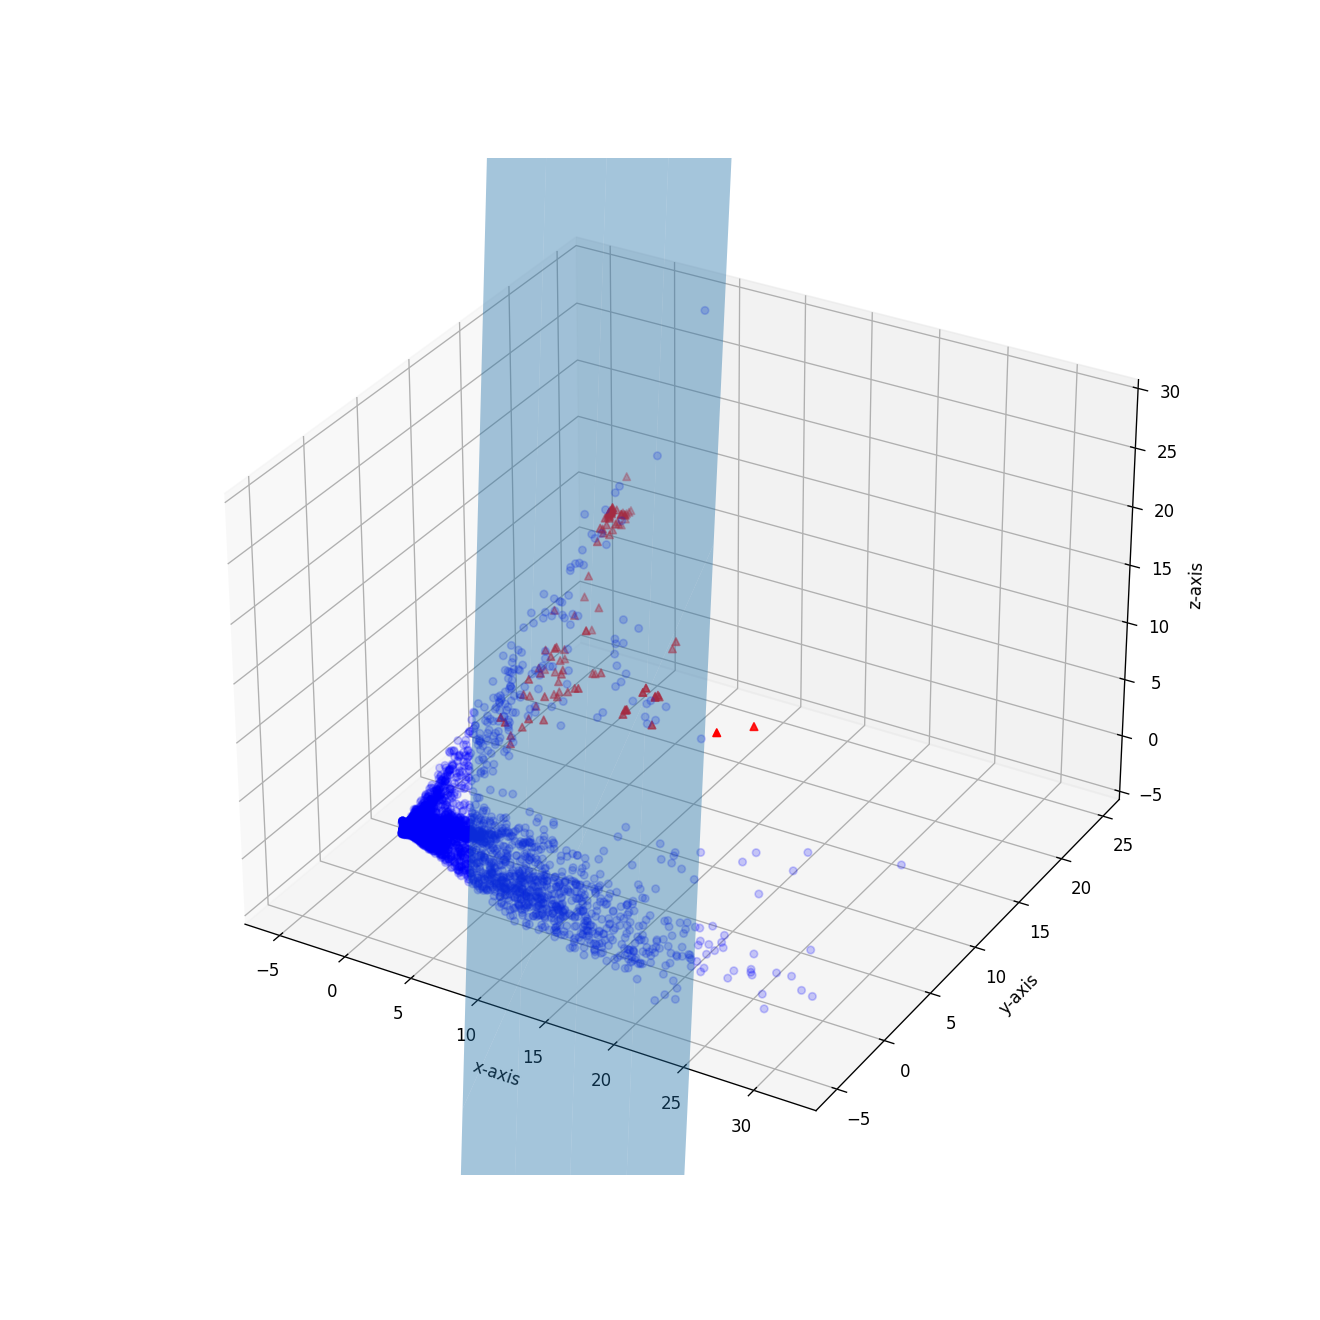

In [17]:
mysvm1(X_pca, C=1)

In [18]:
def hardToClassifie(X, cut=True):
    fig = plt.figure(figsize=(11,11))
    ax = fig.add_subplot(111, projection='3d')

    if cut:
        X = [x for x in X if x[:3]@np.array([0,1,1])-10 > 0]
    
    
    tmpOnes = [x[:4] for x in X if x[-1]==1]
    tmpZeros = [x[:4] for x in X if x[-1]==0]
    
    

    X_ones = np.array(tmpOnes)
    X_zeros = np.array(tmpZeros)
    



    ax.scatter(X_ones[:,0], X_ones[:,1], X_ones[:,2], marker="^", c = "r")
    ax.scatter(X_zeros[:,0], X_zeros[:,1], X_zeros[:,2], c = "b")
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.set_zlabel("z-axis")
    
    
    
    
    xx, yy = np.meshgrid(np.linspace(-5,15, 5), np.linspace(-5,15,5))

    z = (-0*xx - 1*yy+10)


    ax.plot_surface(xx, yy, z, alpha=0.4)
    

<IPython.core.display.Javascript object>


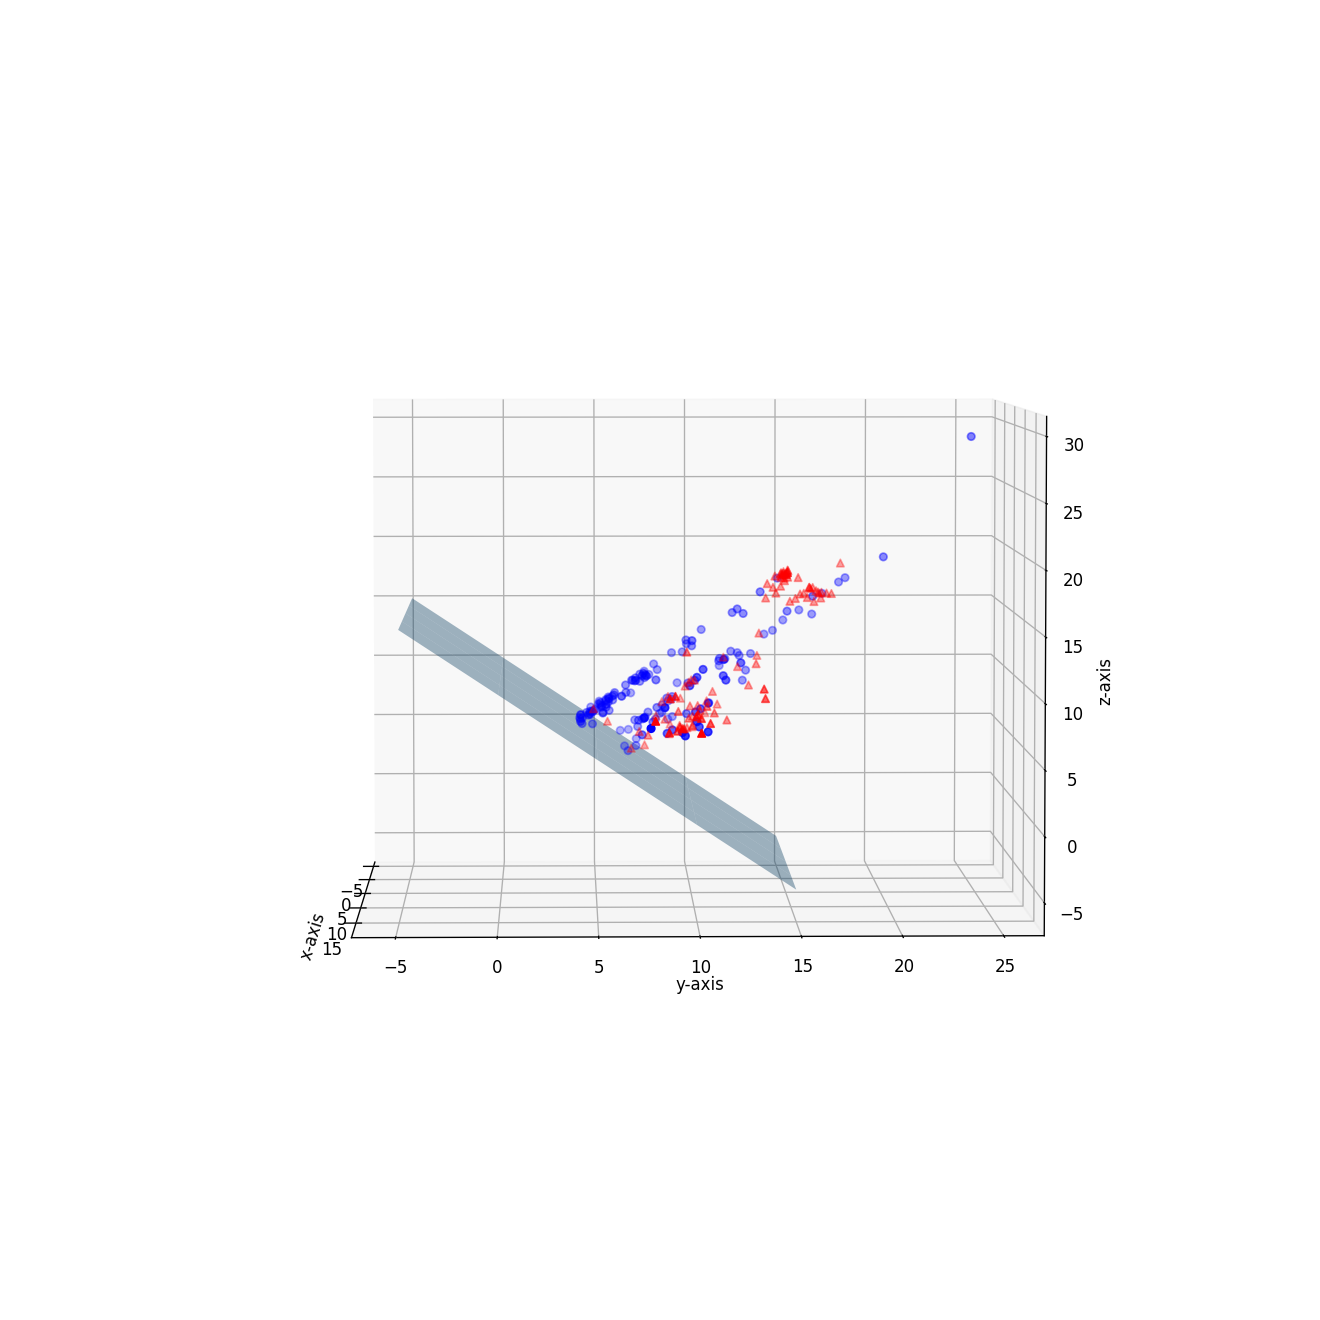

In [20]:
hardToClassifie(X_pca,cut=True)

<IPython.core.display.Javascript object>


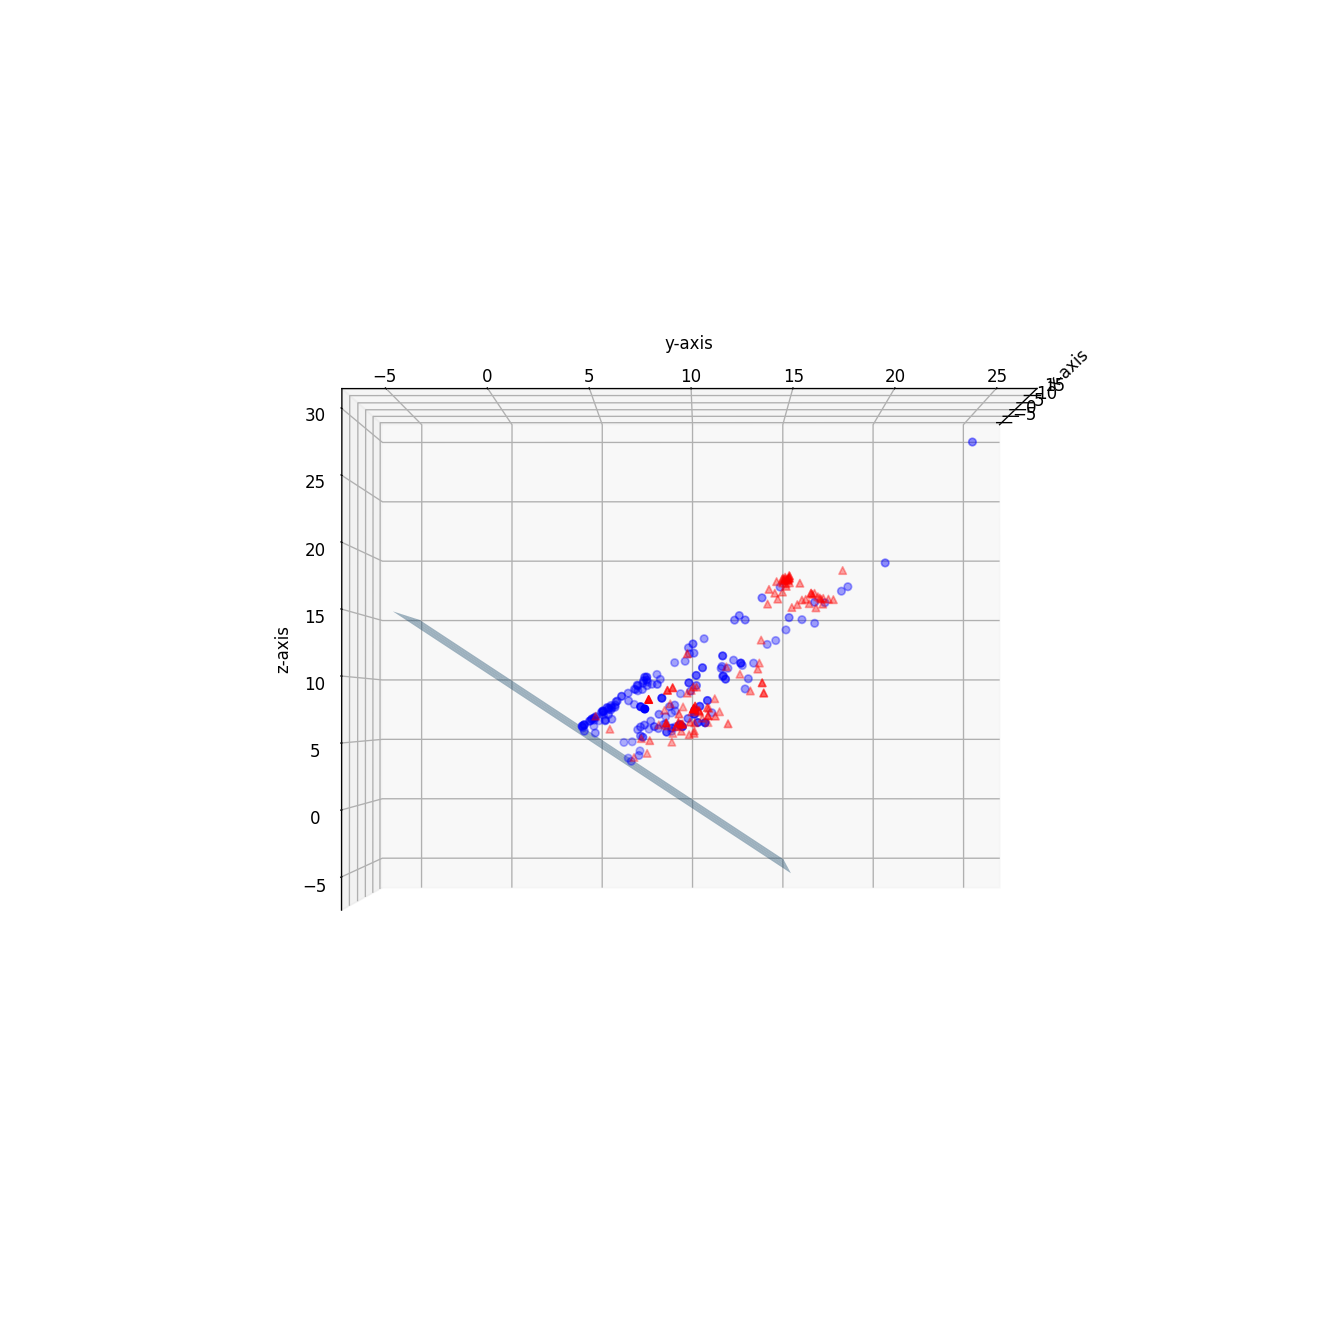

In [21]:
hardToClassifie(X_pca)

<IPython.core.display.Javascript object>


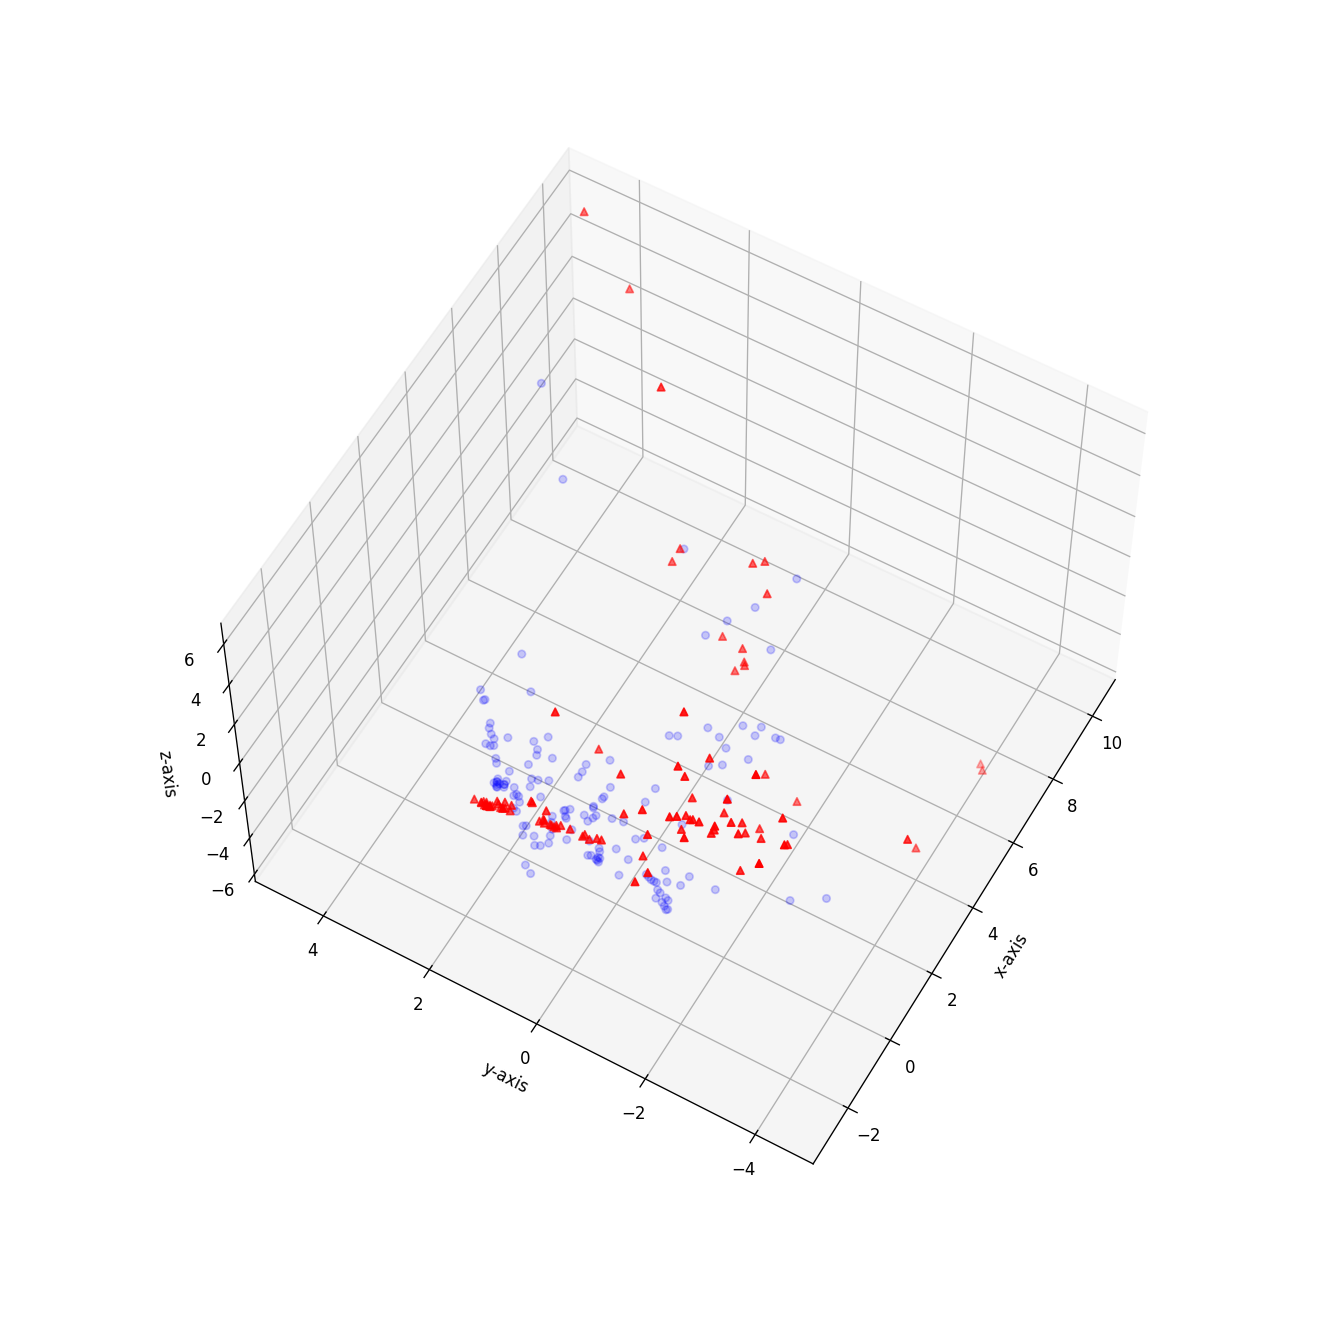

<Axes3DSubplot:xlabel='x-axis', ylabel='y-axis'>

In [22]:
# pca mit nur den Punkten oberhalb der Trennebene


filters = []
for i in range(X_pca.shape[0]):
    if X_pca[i,:3]@np.array([0,1,1]) -10 <= 0:
        filters.append(False)
    else:
        filters.append(True)

X = X[filters]
X_scaled, target = extractDataTarget(X)
X_pca = pcaTargetCombine(X_scaled, target)
plot3d(X_pca)